# Experiment Cluster Metrics

The 50 Pandas Dataframes below capture the following metrics for each of the 50 lattice machines in the cluster in the duration on the experiment:

- Timestamp
- CPU Usage: User Percent
- CPU Usage: System Percent
- Memory Total
- Memory Active
- Memory Inactive
- Network: eno1 Writes in KB/s
- Network: eno1 Reads in KB/s
- Network: eno2 Writes in KB/s
- Network: eno2 Reads in KB/s
- Disk Reads: sda
- Disk Reads: sdb
- Disk Reads: sdc
- Disk Reads: sdd
- Disk Writes: sda
- Disk Writes: sdb
- Disk Writes: sdc
- Disk Writes: sdd

In [30]:
# NOTEBOOK VARIABLES

experiment = "unsharded"
cluster_metric = "CPU_ALL:User%" # See dataframe for column titles

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [32]:
def hostname_to_ip(machine_name):
    parts = machine_name.split("-")
    if parts[0] == "lattice":
        number = int(parts[1])
        base = number + 10 # starts at lattice-100 : 129.82.208.110
        return "129.82.208." + str(base)
    else:
        print("Invalid hostname: ", machine_name)
        return None
        

In [33]:
dir_prefix = f"experiment_data/cluster_metrics/{experiment}"
machines_files = [(f"lattice-{i}", str(i-100)+"-"+hostname_to_ip(f"lattice-{i}")+".nmon.csv") for i in range(100, 150)]
machines_dfs = {}
for machine_entry in machines_files:
    machines_dfs[machine_entry[0]] = pd.read_csv(f"{dir_prefix}/{machine_entry[1]}", header=0)
    
machines_dfs["lattice-100"]

,timestamp,CPU_ALL:User%,CPU_ALL:Sys%,MEM:memtotal,MEM:active,MEM:inactive,NET:eno1-write-KB/s,NET:eno1-read-KB/s,NET:eno2-write-KB/s,NET:eno2-read-KB/s,DISKREAD:sda,DISKREAD:sdb,DISKREAD:sdc,DISKREAD:sdd,DISKWRITE:sda,DISKWRITE:sdb,DISKWRITE:sdc,DISKWRITE:sdd
0,1620721503,11.6,7.6,31828.8,13872.9,6686.0,136.5,165.2,0.0,0.0,95.8,0.0,0.0,0.0,2.8,0.0,0.0,0.0
1,1620721504,1.9,1.8,31828.8,13844.5,6686.0,71.4,19.4,0.0,0.0,0.0,0.0,0.0,0.0,79.8,0.0,0.0,0.0
2,1620721505,2.2,2.2,31828.8,13845.6,6686.0,382.0,31.7,0.0,0.0,0.0,0.0,0.0,0.0,522.9,0.0,0.0,0.0
3,1620721506,4.1,3.2,31828.8,13870.2,6686.0,75.2,44.1,0.0,0.0,0.0,0.0,0.0,0.0,243.5,0.0,0.0,0.0
4,1620721507,1.2,1.7,31828.8,13870.2,6686.0,16.1,13.1,0.0,0.0,0.0,0.0,0.0,0.0,175.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,1620724181,2.2,1.9,31828.8,13856.4,6715.4,67.3,23.9,0.0,0.0,0.0,0.0,0.0,0.0,263.5,0.0,0.0,0.0
2633,1620724182,3.2,2.2,31828.8,13874.2,6715.4,13.9,10.7,0.0,0.0,0.0,0.0,0.0,0.0,139.7,0.0,0.0,0.0
2634,1620724183,1.7,1.7,31828.8,13856.4,6715.4,76.6,25.6,0.0,0.0,0.0,0.0,0.0,0.0,35.9,0.0,0.0,0.0
2635,1620724184,1.4,1.6,31828.8,13863.9,6715.4,22.7,13.9,0.0,0.0,0.0,0.0,0.0,0.0,63.8,0.0,18.8,0.0


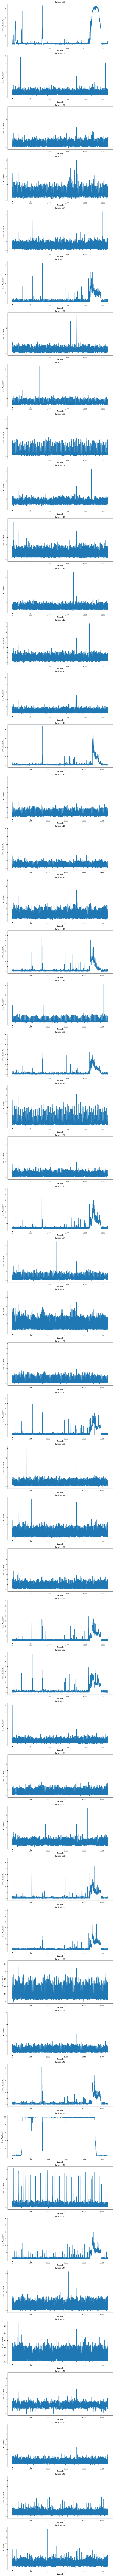

In [34]:
# ---- NMON Profiling ----

# Create a figure
figure, axis = plt.subplots(len(machines_dfs), 1, figsize=(12,300))

for i, hostname in enumerate(machines_dfs.keys()):
    df = machines_dfs[hostname]
    data_list = df[cluster_metric].to_list()
    axis[i].plot(data_list)
    axis[i].set_xlabel("Seconds")
    axis[i].set_ylabel(cluster_metric)
    axis[i].set_title(hostname)


# show plot
plt.show()